In [3]:
!pip uninstall tensorflow -y
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow-decision-forests 1.8.1 requires tensorflow~=2.15.0, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.17.0 which is incompatible.


In [2]:
import tensorflow as tf
from keras.layers import Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Rescaling

# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

2024-08-01 21:23:44.164690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 21:23:44.186638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 21:23:44.192981: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1722547429.572974      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.745411      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.745678      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.748709      35 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


I0000 00:00:1722547429.864203      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.864474      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.864651      35 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722547429.864837      35 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [15]:
# !conda install -y gdown
!conda install -y unrar
!pip install gdown
# !pip install unrar

Retrieving notices: ...working... done
Channels:
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - unrar


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-24.7.1               |  py310hff52083_0         940 KB  conda-forge
    libunrar-7.0.9             |       h297d8ca_0         324 KB  conda-forge
    openssl-3.3.1              |       h4bc722e_2         2.8 MB  conda-forge
    unrar-0.4                  |     pyhd8ed1ab_1          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  libunrar           conda-forge/linux-64::libunrar-7.0.9-h297d8ca_0 
  unrar              conda-forge/noarch::unrar-0.4-pyhd8e

In [16]:
# !gdown "1g207Aq3aj8my3GffX7ihFer8XZlArOAs"
# !gdown "1ShzieDeoSSi94MmxZ4puBxuUhecSEpA5"
!gdown "1Wziuc7hsLs5gluWbn0A9NfUe2DZFH2fC"

Downloading...
From (original): https://drive.google.com/uc?id=1Wziuc7hsLs5gluWbn0A9NfUe2DZFH2fC
From (redirected): https://drive.google.com/uc?id=1Wziuc7hsLs5gluWbn0A9NfUe2DZFH2fC&confirm=t&uuid=0495f814-4ffb-4fd0-a2ee-30dcf498044a
To: /kaggle/working/224-classifier-w-real.rar
100%|██████████████████████████████████████| 1.48G/1.48G [00:17<00:00, 84.9MB/s]


In [17]:
# !unrar x /content/final_cropped_dataset.rar
# # !unrar x /content/final_cropped_dataset100x100.rar
# !unrar x /content/augment_cropped_ocluded.rar
!unrar x 224-classifier-w-real.rar


UNRAR 7.01 freeware      Copyright (c) 1993-2024 Alexander Roshal


Extracting from 224-classifier-w-real.rar

Creating    224-classifier-w-real                                     OK
Creating    224-classifier-w-real/train                               OK
Extracting  224-classifier-w-real/train/10B_00e4186480a06587caf04bd5cdfea8cc_1080_10_bottom_sixth_random_1.png     0  OK 
Extracting  224-classifier-w-real/train/10B_00e4186480a06587caf04bd5cdfea8cc_1080_10_left_half_random_1.png     0  OK 
Extracting  224-classifier-w-real/train/10B_00e4186480a06587caf04bd5cdfea8cc_1080_10_right_half_random_1.png     0  OK 
Extracting  224-classifier-w-real/train/10B_00e4186480a06587caf04bd5cdfea8cc_1080_10_top_left_quarter_random_1.png     0  OK 
Extracting  224-classifier-w-real/train/10B_00e4186480a06587caf04bd5cdfea8cc_1080_10_top_sixth_random_1.png     0  OK 
Extracting  224-classifier-w-real/train/10B_114a4ab5c3363398cd16a4df0aea9cdb_1235_974.png     0  OK 
Extracting  224-classifier-w-real/t

In [7]:
# !mv /content/augment/* /content/final_cropped_dataset/train

In [18]:
import pandas as pd
import os

train_folder = '224-classifier-w-real/train/'
val_folder = '224-classifier-w-real/val/'
# Cargar los nombres de los archivos en una columna
train_images = [train_folder + f for f in os.listdir(train_folder) if os.path.isfile(os.path.join(train_folder, f))]
val_images = [val_folder + f for f in os.listdir(val_folder) if os.path.isfile(os.path.join(val_folder, f))]

# Create dataframes from the lists
df_train = pd.DataFrame(train_images, columns=['image_path'])
df_val = pd.DataFrame(val_images, columns=['image_path'])


In [19]:
# Extraer la clase
def extract_class(image_path):
    image_name = os.path.basename(image_path)
    return image_name.split('_')[0]

df_train['class'] = df_train['image_path'].apply(extract_class)
df_val['class'] = df_val['image_path'].apply(extract_class)

df_train['class'].unique()

array(['5O', '11C', '3E', '12O', '1E', '9C', '10B', '12B', '4C', '7C',
       '2E', '6B', '2B', '3B', '11B', '9E', '6O', '2O', '4O', '4B', '5B',
       '1O', '7O', '8C', '10E', 'J', '12E', '10O', '9O', '1C', '6C', '7E',
       '8B', '1B', '11E', '6E', '5C', '3O', '2C', '11O', '9B', '4E',
       '10C', '5E', '8E', '7B', '12C', '3C', '8O', 'UNKNOWN'],
      dtype=object)

In [20]:
df_train = df_train[df_train['class'].apply(len) <= 3]
df_val = df_val[df_val['class'].apply(len) <= 3]
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_train

image_path class
0      224-classifier-w-real/train/5O_e635d819da3bb00...    5O
1      224-classifier-w-real/train/11C_7a9b2c9e5aaab2...   11C
2      224-classifier-w-real/train/3E_57ac924731d27ce...    3E
3      224-classifier-w-real/train/12O_51659_antonio_...   12O
4      224-classifier-w-real/train/1E_43265_Lucas_Dem...    1E
...                                                  ...   ...
13402  224-classifier-w-real/train/4B_cropped_left_ha...    4B
13403  224-classifier-w-real/train/4B_eb3df17114286c3...    4B
13404  224-classifier-w-real/train/1E_b278e0515c6aa1e...    1E
13405  224-classifier-w-real/train/7E_58491_fabio_gia...    7E
13406  224-classifier-w-real/train/10B_12394_escandel...   10B

[13407 rows x 2 columns]

In [21]:
# Function to split the class label into number and letter components
def split_class(class_label):
    number = ''.join(filter(str.isdigit, class_label))
    letter = ''.join(filter(str.isalpha, class_label))
    return number, letter

# Apply the split_class function to create separate columns
df_train[['number', 'palo']] = df_train['class'].apply(lambda x: pd.Series(split_class(x)))
df_val[['number', 'palo']] = df_val['class'].apply(lambda x: pd.Series(split_class(x)))

df_train[df_train['class'] == 'J']

image_path class number palo
38     224-classifier-w-real/train/J_P_51977_martin_p...     J           J
48     224-classifier-w-real/train/J_b57b42f7552779b3...     J           J
160    224-classifier-w-real/train/J_43265_Lucas_Dema...     J           J
194    224-classifier-w-real/train/J_0149f57e591b1220...     J           J
297    224-classifier-w-real/train/J_17211af4d041d345...     J           J
...                                                  ...   ...    ...  ...
12976  224-classifier-w-real/train/J_564a91378d9b3f67...     J           J
13096  224-classifier-w-real/train/J_bc6f1ca08f613418...     J           J
13124  224-classifier-w-real/train/J_71846_Brisa_Mene...     J           J
13162  224-classifier-w-real/train/J_P_51977_martin_p...     J           J
13238  224-classifier-w-real/train/J_e1e68de67a103e5c...     J           J

[211 rows x 4 columns]

In [22]:
# Perform one-hot encoding on the 'number' and 'palo' columns
df_train_encoded = pd.get_dummies(df_train, columns=['number', 'palo']).drop(columns=['number_'])
df_val_encoded = pd.get_dummies(df_val, columns=['number', 'palo']).drop(columns=['number_'])

In [23]:
# Rename the columns to remove the prefix
df_train_encoded.columns = [col.replace('number_', '').replace('palo_', '') for col in df_train_encoded.columns]
df_val_encoded.columns = [col.replace('number_', '').replace('palo_', '') for col in df_val_encoded.columns]

# Define the desired column order
desired_order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'O', 'C', 'E', 'B', 'J']

# Reindex the columns according to the desired order
df_train_encoded = df_train_encoded.reindex(columns=['image_path', 'class'] + desired_order)
df_val_encoded = df_val_encoded.reindex(columns=['image_path', 'class'] + desired_order)

# Convert specific columns to 0 and 1
df_train_encoded[desired_order] = df_train_encoded[desired_order].astype(int)
df_val_encoded[desired_order] = df_val_encoded[desired_order].astype(int)

In [11]:
df_train_encoded

image_path class  1  2  3  4  5  \
0      224-classifier-w-real/train/2E_85bf9b1b219172b...    2E  0  1  0  0  0   
1      224-classifier-w-real/train/3O_12394_escandell...    3O  0  0  1  0  0   
2      224-classifier-w-real/train/6C_58491_fabio_gia...    6C  0  0  0  0  0   
3      224-classifier-w-real/train/4O_03531_mirian_ya...    4O  0  0  0  1  0   
4      224-classifier-w-real/train/1C_71846_Brisa_Men...    1C  1  0  0  0  0   
...                                                  ...   ... .. .. .. .. ..   
13402  224-classifier-w-real/train/1B_cropped_top_six...    1B  1  0  0  0  0   
13403  224-classifier-w-real/train/7C_S57061_Leandro_...    7C  0  0  0  0  0   
13404  224-classifier-w-real/train/10E_P_51977_martin...   10E  0  0  0  0  0   
13405  224-classifier-w-real/train/5O_f37478_santiago...    5O  0  0  0  0  1   
13406  224-classifier-w-real/train/3C_a8b7acca23be1e0...    3C  0  0  1  0  0   

       6  7  8  9  10  11  12  O  C  E  B  J  
0      0  0  0  0   0   0   0  0  0  1  0  0  
1      0  0  0  0   0   0   0  1  0  0  0  0  
2      1  0  0  0   0   0   0  0  1  0  0  0  
3      0  0  0  0   0   0   0  1  0  0  0  0  
4      0  0  0  0   0   0   0  0  1  0  0  0  
...   .. .. .. ..  ..  ..  .. .. .. .. .. ..  
13402  0  0  0  0   0   0   0  0  0  0  1  0  
13403  0  1  0  0   0   0   0  0  1  0  0  0  
13404  0  0  0  0   1   0   0  0  0  1  0  0  
13405  0  0  0  0   0   0   0  1  0  0  0  0  
13406  0  0  0  0   0   0   0  0  1  0  0  0  

[13407 rows x 19 columns]

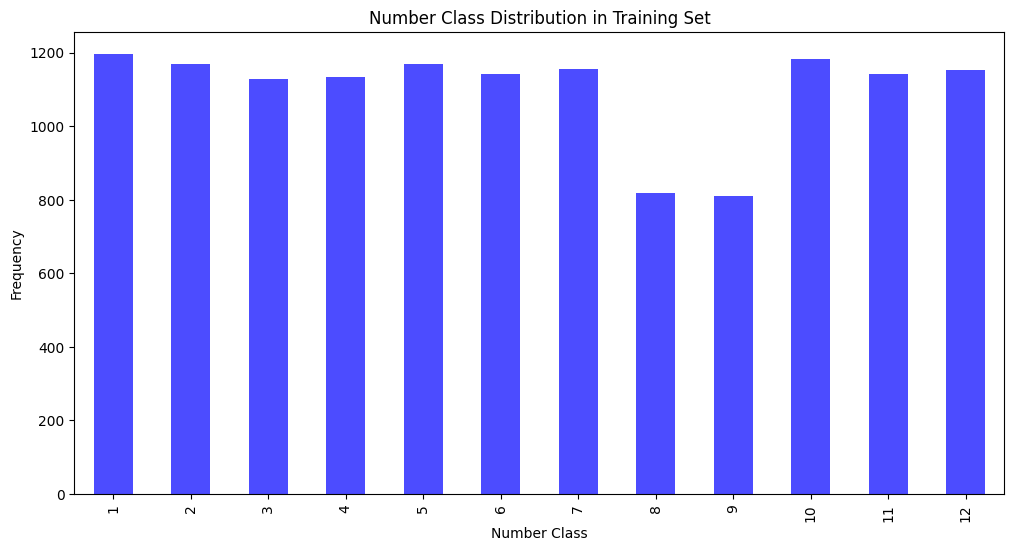

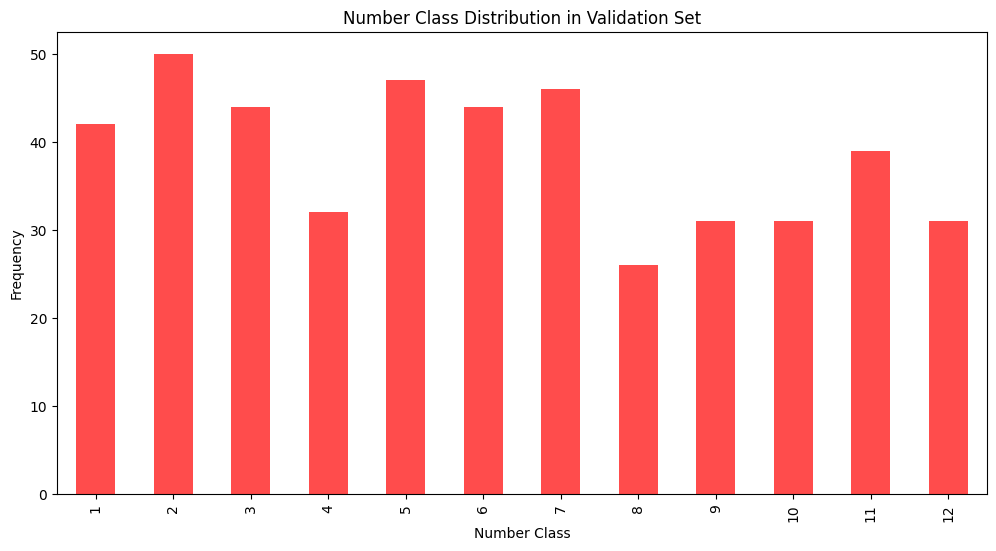

In [18]:
# Sum the one-hot encoded columns for the numbers
train_number_distribution = df_train_encoded[map(str, range(1, 13))].sum()
val_number_distribution = df_val_encoded[map(str, range(1, 13))].sum()

# Plot the distribution for the number classes in the training set
plt.figure(figsize=(12, 6))
train_number_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number Class Distribution in Training Set')
plt.xlabel('Number Class')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution for the number classes in the validation set
plt.figure(figsize=(12, 6))
val_number_distribution.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number Class Distribution in Validation Set')
plt.xlabel('Number Class')
plt.ylabel('Frequency')
plt.show()


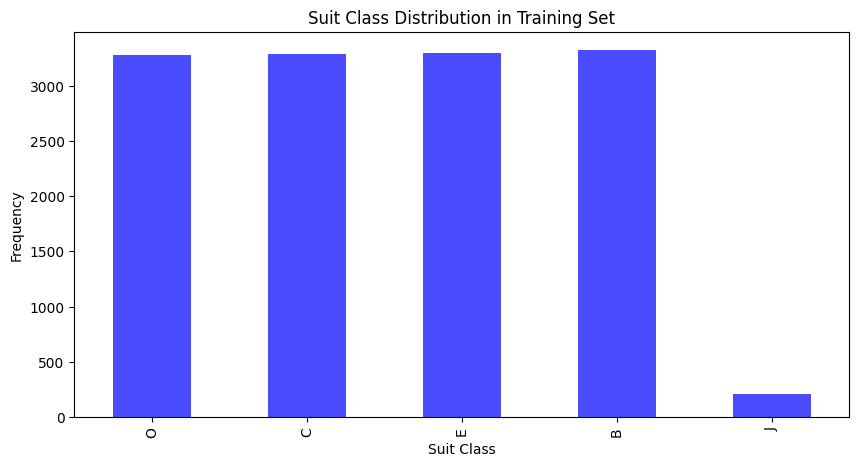

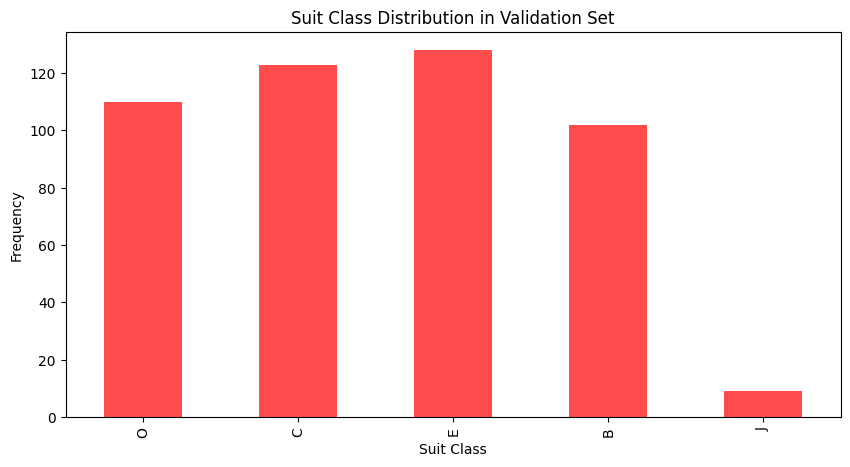

In [20]:
# Sum the one-hot encoded columns for the suits
train_suit_distribution = df_train_encoded[['O', 'C', 'E', 'B', 'J']].sum()
val_suit_distribution = df_val_encoded[['O', 'C', 'E', 'B', 'J']].sum()

# Plot the distribution for the suit classes in the training set
plt.figure(figsize=(10, 5))
train_suit_distribution.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Suit Class Distribution in Training Set')
plt.xlabel('Suit Class')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution for the suit classes in the validation set
plt.figure(figsize=(10, 5))
val_suit_distribution.plot(kind='bar', color='red', alpha=0.7)
plt.title('Suit Class Distribution in Validation Set')
plt.xlabel('Suit Class')
plt.ylabel('Frequency')
plt.show()


In [24]:
from tqdm import tqdm
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [25]:
# # Crear los arrays para entrenamiento y validación
# number_train_image = []
# try:
#     for i in tqdm(range(df_train_encoded.shape[0])):
#         img = image.load_img(df_train_encoded['image_path'][i],target_size=(224,224,3))
#         img = image.img_to_array(img)
#         img = img
#         number_train_image.append(img)
#     X_train = np.array(number_train_image)
# except KeyError as e:
#     print(f"KeyError at index {i}: {e}")
#     plt.imshow(image.load_img(df_train_encoded['image_path'][i],target_size=(224,224,3)))
#     print('imagen problemática')
# number_val_image = []
# for i in tqdm(range(df_val_encoded.shape[0])):
#     img = image.load_img(df_val_encoded['image_path'][i],target_size=(224,224,3))
#     img = image.img_to_array(img)
#     img = img
#     number_val_image.append(img)
# X_val = np.array(number_val_image)



In [25]:
# import tensorflow as tf
# import pandas as pd

# # Ensure df_train_encoded and df_val_encoded are already prepared as per your code
# # Filter the DataFrame to include only number columns (1 to 12)
# number_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'O', 'C', 'E', 'B', 'J']

# df_train_numbers_only = df_train_encoded[['image_path', 'class'] + number_columns]
# df_val_numbers_only = df_val_encoded[['image_path', 'class'] + number_columns]

# # Extract the image paths and labels
# train_image_paths = df_train_numbers_only['image_path'].values
# train_labels = df_train_numbers_only.drop(columns=['image_path', 'class']).values
# print(train_labels[0])

# val_image_paths = df_val_numbers_only['image_path'].values
# val_labels = df_val_numbers_only.drop(columns=['image_path', 'class']).values

# def load_img(image_path, label):
#     image = tf.io.read_file(image_path)
#     image = tf.image.decode_jpeg(image, channels=3)
#     image = tf.image.resize(image, [224, 224])  # Assuming your images are 224x224
#     image = tf.cast(image, tf.float32)  
#     return image, label

# # Create TensorFlow datasets from the image paths and labels
# train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
# val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))

# # Shuffle before mapping
# train_dataset = train_dataset.shuffle(buffer_size=len(train_image_paths))
# val_dataset = val_dataset.shuffle(buffer_size=len(val_image_paths))

# # Map the load_img function to the datasets
# train_dataset = train_dataset.map(load_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# val_dataset = val_dataset.map(load_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# # Batch and prefetch the datasets
# batch_size = 128  # Adjust based on your available memory and model requirements

# train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

import tensorflow as tf
import pandas as pd

# Ensure df_train_encoded and df_val_encoded are already prepared as per your code
# Define columns for numbers and suits
number_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
suit_columns = ['O', 'C', 'E', 'B', 'J']

# Extract the image paths and labels
train_image_paths = df_train_encoded['image_path'].values
train_labels_numbers = df_train_encoded[number_columns].values
train_labels_suits = df_train_encoded[suit_columns].values

val_image_paths = df_val_encoded['image_path'].values
val_labels_numbers = df_val_encoded[number_columns].values
val_labels_suits = df_val_encoded[suit_columns].values

# Define a function to load and preprocess the images
def load_img(image_path, label_number, label_suit):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Assuming your images are 224x224
    image = tf.cast(image, tf.float32) 
    return image, (label_number, label_suit)

# Create TensorFlow datasets from the image paths and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels_numbers, train_labels_suits))
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels_numbers, val_labels_suits))

# Shuffle before mapping
train_dataset = train_dataset.shuffle(buffer_size=len(train_image_paths))
val_dataset = val_dataset.shuffle(buffer_size=len(val_image_paths))

# Map the load_img function to the datasets
train_dataset = train_dataset.map(load_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.map(load_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Batch and prefetch the datasets
batch_size = 128  # Adjust based on your available memory and model requirements

train_dataset = train_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)



In [18]:
# # Check a batch of the dataset
# for images, labels in train_dataset.take(1):
#     print(images.shape)  # Should be (batch_size, 224, 224, 3)
#     print(labels.shape)  # Should be (batch_size, num_classes)


tf.Tensor([0 0 0 1 0 0 0 0 0 0 0 0], shape=(12,), dtype=int64)
tf.Tensor([1 0 0 0 0], shape=(5,), dtype=int64)


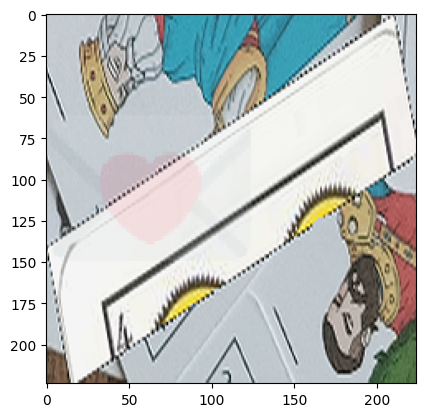

In [19]:
for x, y in train_dataset.take(1):
    plt.imshow(x[5]/255)
    print(y[0][5])
    print(y[1][5])


In [20]:
# y_train = np.array(df_train_encoded.drop(['image_path', 'class'],axis=1))
# y_val = np.array(df_val_encoded.drop(['image_path', 'class'],axis=1))
# print(y_train.shape)
# print(y_val.shape)

# y_train = np.array(df_train_encoded.drop(['image_path', 'class','O','C','E','B','J'],axis=1))
# y_val = np.array(df_val_encoded.drop(['image_path', 'class','O','C','E','B','J'],axis=1))
# y_train.shape
# y_val.shape



In [21]:
# print(X_train.shape)
# print(y_train[:,:12].shape)
# print(X_val.shape)
# print(y_val[:,:12].shape)

In [22]:
# print(len(y_train[0]))
# print(y_train[0])
# # plt.imshow(X_train[0])
# X_train[0]

In [23]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming X_val is your array of images and y_val is your array of labels
# # X_val.shape = (1259, 100, 100, 3)
# # y_val.shape = (1259, 17)

# # Define label names corresponding to the one-hot encoded vectors
# label_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', 'O', 'C', 'E', 'B', 'J']

# # Function to decode one-hot encoded labels to actual labels
# def decode_labels(one_hot_encoded_label):
#     indices = np.where(one_hot_encoded_label == 1)[0]
#     return [label_names[idx] for idx in indices]

# # Plot 10 random images and their respective labels
# num_images = 10
# indices = np.random.choice(X_val.shape[0], num_images, replace=False)

# fig, axes = plt.subplots(1, num_images, figsize=(20, 2))

# for i, idx in enumerate(indices):
#     axes[i].imshow(X_train_numbers[idx])
#     labels = decode_labels(y_train_numbers_filtered[idx])
#     axes[i].set_title(f'Labels: {", ".join(labels)}')
#     axes[i].axis('off')  # Hide axes for better visualization

# plt.show()

NameError: name 'X_val' is not defined

In [1]:
import tensorflow as tf
from keras.layers import Input, RandomFlip, RandomContrast, BatchNormalization, RandomTranslation, Flatten, Dropout
from keras.layers import Dense, DepthwiseConv2D, Conv2D, Activation, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Rescaling

2024-08-12 20:33:34.644227: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 20:33:34.644375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 20:33:34.815517: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Compute the mean of the training set for each channel
mean_train = np.mean(X_train, axis=(0, 1, 2))

In [ ]:
mean_train

In [ ]:
# import numpy as np

# # Example y_train and y_val with 17 classes
# # Assuming y_train and y_val are already one-hot encoded

# # Function to split the labels into number and suit parts
# def split_labels(y):
#     y_numbers = y[:, :12]  # Numbers 1-12
#     y_suits = y[:, 12:]    # Suits O, C, E, B, J
#     return y_numbers, y_suits

# # Split the y_train and y_val
# y_train_numbers, y_train_suits = split_labels(y_train)
# y_val_numbers, y_val_suits = split_labels(y_val)
# print('antes de filtro')
# # Check shapes to ensure correctness
# print(y_train_numbers.shape)  # Should be (num_samples, 12)
# print(y_train_suits.shape)    # Should be (num_samples, 5)
# print(y_val_numbers.shape)    # Should be (num_samples, 12)
# print(y_val_suits.shape)      # Should be (num_samples, 5)
# # print(X_train_numbers.shape)
# # print(X_test_numbers.shape)

# # Create masks where not all elements are zero
# mask_train = np.any(y_train_numbers != 0, axis=1)
# mask_val = np.any(y_val_numbers != 0, axis=1)

# # Apply the mask to get the filtered datasets
# X_train_numbers = X_train[mask_train]
# X_test_numbers = X_val[mask_val]

# # Also apply the masks to the corresponding labels
# y_train_numbers_filtered = y_train_numbers[mask_train]
# y_val_numbers_filtered = y_val_numbers[mask_val]
# print('desp filtro')
# # Check shapes to ensure correctness
# print(y_train_numbers.shape)  # Should be (num_samples, 12)
# print(y_train_suits.shape)    # Should be (num_samples, 5)
# print(y_val_numbers.shape)    # Should be (num_samples, 12)
# print(y_val_suits.shape)      # Should be (num_samples, 5)

# # # Now you can train the model with the separated labels
# # model.fit(X_train, [y_train_numbers, y_train_suits], epochs=50, validation_data=(X_val, [y_val_numbers, y_val_suits]), batch_size=16)

# # # model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=16)
# print("X shapes")
# print(X_train_numbers.shape)
# print(X_test_numbers.shape)

In [25]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    """
    Custom loss that handles numbers, suits, and Joker separately.
    Applies categorical cross-entropy for numbers and suits, and binary cross-entropy for Joker.
    """
    # Separate the true labels and predictions
    y_true_num = y_true[:, :12]  # First 12 labels are numbers
    y_pred_num = y_pred[:, :12]
    y_true_suit = y_true[:, 12:17]  # Next 5 labels are suits (including Joker)
    y_pred_suit = y_pred[:, 12:17]
    
    # Categorical cross-entropy for numbers
    loss_num = tf.keras.losses.categorical_crossentropy(y_true_num, y_pred_num, from_logits=False)

    # Categorical cross-entropy for suits (including Joker)
    loss_suit = tf.keras.losses.categorical_crossentropy(y_true_suit, y_pred_suit, from_logits=False)

    # Combine the losses
    total_loss = tf.reduce_mean(loss_num) * 1.25 + tf.reduce_mean(loss_suit) * 0.
    return total_loss

@tf.function
def custom_number_loss(y_true, y_pred):
    """
    Custom loss that handles numbers, suits, and Joker separately.
    Applies categorical cross-entropy for numbers and suits, and binary cross-entropy for Joker.
    """
    # Separate the true labels and predictions
    y_true_num = y_true  # First 12 labels are numbers
    y_pred_num = y_pred
    
    # Categorical cross-entropy for numbers
    loss_num = tf.keras.losses.categorical_crossentropy(y_true_num, y_pred_num, from_logits=False)

    return loss_num
@tf.function
def custom_suit_loss(y_true, y_pred):
    """
    Custom loss that handles numbers, suits, and Joker separately.
    Applies categorical cross-entropy for numbers and suits, and binary cross-entropy for Joker.
    """
    # Separate the true labels and predictions
    y_true_suit = y_true  # Next 5 labels are suits (including Joker)
    y_pred_suit = y_pred
    
    # Categorical cross-entropy for suits (including Joker)
    loss_suit = tf.keras.losses.categorical_crossentropy(y_true_suit, y_pred_suit, from_logits=False)

    return loss_suit * 0.2


def custom_accuracy(y_true, y_pred):
    """
    Custom accuracy for card classification problem.
    A correct guess is when both the number and the suit match for non-Joker cards.
    For Joker cards, the 'J' must be the highest among the suits.
    """
    # Separate the true labels and predictions
    y_true_num = y_true[:, :12]  # First 12 labels are numbers
    y_pred_num = y_pred[:, :12]
    y_true_suit = y_true[:, 12:16]  # Next 4 labels are suits
    y_pred_suit = y_pred[:, 12:16]
    y_true_joker = y_true[:, 16]  # Last label is Joker
    y_pred_joker = y_pred[:, 16]

    # Predicted number and suit indices
    pred_num_idx = tf.argmax(y_pred_num, axis=1)
    true_num_idx = tf.argmax(y_true_num, axis=1)
    pred_suit_idx = tf.argmax(y_pred_suit, axis=1)
    true_suit_idx = tf.argmax(y_true_suit, axis=1)

    # Correct predictions for non-Joker cards (both number and suit must match)
    correct_non_joker = tf.logical_and(
        tf.equal(pred_num_idx, true_num_idx),
        tf.equal(pred_suit_idx, true_suit_idx)
    )

    # Correct predictions for Joker cards (J must be the highest among suits)
    correct_joker = tf.logical_and(
        tf.equal(true_suit_idx, 3),  # Assuming 'J' is the 4th suit (index 3)
        tf.equal(pred_suit_idx, 3)
    )

    # Combine non-Joker and Joker accuracies
    correct_predictions = tf.logical_or(correct_non_joker, correct_joker)

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy

@tf.function
def custom_suit_accuracy(y_true, y_pred):
    """
    Custom accuracy for suit predictions.
    """
    pred_suit_idx = tf.argmax(y_pred, axis=1)
    true_suit_idx = tf.argmax(y_true, axis=1)
    correct_suit_predictions = tf.equal(pred_suit_idx, true_suit_idx)
    suit_accuracy = tf.reduce_mean(tf.cast(correct_suit_predictions, tf.float32))
    return suit_accuracy

@tf.function
def custom_number_accuracy(y_true, y_pred):
    """
    Custom accuracy for number predictions.
    """
    pred_num_idx = tf.argmax(y_pred, axis=1)
    true_num_idx = tf.argmax(y_true, axis=1)
    correct_num_predictions = tf.equal(pred_num_idx, true_num_idx)
    number_accuracy = tf.reduce_mean(tf.cast(correct_num_predictions, tf.float32))
    return number_accuracy


In [2]:
# base_model = tf.keras.applications.MobileNetV3Small(input_shape=(100,100,3),
#                                               include_top=False,
#                                               weights='imagenet')

# base_model.summary()
from tensorflow.keras.regularizers import l2

def build_transfer_model(input_shape, num_classes):
    base_model = tf.keras.applications.MobileNetV3Large(input_shape=input_shape,
                                                        include_top=False,
                                                        weights='imagenet')
    base_model.trainable = True

    i = Input(shape=input_shape)
    # Data augmentation (uncomment if needed)
    # x = tf.keras.layers.RandomFlip("horizontal_and_vertical")(i)
    # x = tf.keras.layers.RandomContrast(0.2)(x)
    # x = tf.keras.layers.RandomRotation(0.2)(x)
    
    x = base_model(i, training=True)
    x_n = GlobalMaxPooling2D()(x)
    x_n = Dropout(0.4)(x_n)  # Add dropout to prevent overfitting
    x_n = Dense(30, activation='relu', kernel_regularizer=l2(1e-4))(x_n)  # Add dense layer with L2 regularization
    x_n = BatchNormalization()(x_n)  # Add batch normalization
    x_n = Dropout(0.35)(x_n)  # Add another dropout layer
    x_n = Dense(15, activation='relu', kernel_regularizer=l2(1e-4))(x_n)  # Add dense layer with L2 regularization
    x_n = BatchNormalization()(x_n)  # Add batch normalization
    x_n = Dropout(0.35)(x_n)  # Add another dropout layer
    x_n = Dense(15, activation='relu', kernel_regularizer=l2(1e-4))(x_n)  # Add dense layer with L2 regularization
    x_n = BatchNormalization()(x_n)  # Add batch normalization
    
    x_s = GlobalMaxPooling2D()(x)
    x_s = Dropout(0.5)(x_s)  # Add dropout to prevent overfitting
    x_s = Dense(20, activation='relu', kernel_regularizer=l2(1e-4))(x_s)  # Add dense layer with L2 regularization
    x_s = BatchNormalization()(x_s)  # Add batch normalization
    x_s = Dropout(0.5)(x_s)  # Add another dropout layer
    x_s = Dense(15, activation='relu', kernel_regularizer=l2(1e-4))(x_s)  # Add dense layer with L2 regularization
    x_s = BatchNormalization()(x_s)  # Add batch normalization
    x_s = Dropout(0.5)(x_s)  # Add another dropout layer
    x_s = Dense(15, activation='relu', kernel_regularizer=l2(1e-4))(x_s)  # Add dense layer with L2 regularization
    x_s = BatchNormalization()(x_s)  # Add batch normalization
    
    # Output for numbers
    x_number = Dropout(0.35)(x_n)  # Add another dropout layer
    num_output = Dense(12, activation='softmax', name='num_output')(x_number)
    
    # Output for suits (including Joker)
    x_suit = Dropout(0.4)(x_s)  # Add another dropout layer
    suit_output = Dense(5, activation='softmax', name='suit_output')(x_suit)

    model = tf.keras.Model(inputs=i, outputs=[num_output, suit_output])
    return model

In [3]:
from tensorflow.keras.optimizers import Adam
# # base_model = tf.keras.applications.MobileNetV3Small(input_shape=(150,150,3),
# #                                               include_top=False,
# #                                               weights='imagenet')
model = build_transfer_model((224,224,3), 17)
initial_learning_rate = 0.00001  # Reduced learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)  # Add gradient clipping

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003)#, clipnorm=1.0)  # Add gradient clipping
# Se entreno con clipnorm=1.0 y lr=0.0001 y cuando se estancó se quitó el clipnorm y aumento el lr a 0.0003


model.compile(optimizer=optimizer,
              loss={'num_output': 'categorical_crossentropy', 'suit_output': 'categorical_crossentropy'},
              loss_weights={'num_output': 1.0, 'suit_output': 0.1},
              metrics={'num_output': ['accuracy', 'recall'], 'suit_output': ['accuracy', 'recall']})
model.summary()

12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MobileNetV3Large    │ (None, 7, 7, 960) │  2,996,352 │ input_layer_1[0]… │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 960)       │          0 │ MobileNetV3Large… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 960)       │          0 │ MobileNetV3Large… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 960)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 960)       │          0 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │     28,830 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 20)        │     19,220 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 30)        │        120 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20)        │         80 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 30)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 20)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 15)        │        465 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 15)        │        315 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15)        │         60 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15)        │         60 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 15)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 15)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 15)        │        240 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 15)        │        240 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15)        │         60 │ dense_2[0][0]   

 Total params: 3,046,374 (11.62 MB)

 Trainable params: 3,021,754 (11.53 MB)

 Non-trainable params: 24,620 (96.17 KB)

In [60]:
import tensorflow as tf
import numpy as np
import os

class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False, filepath='best_model_weights.h5', verbose=0):
        super(SaveBestModel, self).__init__()
        self.save_best_metric = save_best_metric
        self.max = this_max
        self.verbose = verbose
        self.filepath = filepath
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs.get(self.save_best_metric)
        if metric_value is None:
            return  # Skip if the metric is not in logs

        if np.isnan(metric_value):
            if self.verbose > 0:
                print(f"Skipping saving model at epoch {epoch+1} due to NaN in {self.save_best_metric}.")
            return  # Skip saving if the metric is NaN

        if (self.max and metric_value > self.best) or (not self.max and metric_value < self.best):
            self.best = metric_value
            self.model.save_weights(self.filepath)
            if self.verbose > 0:
                print(f"Saving best model weights at epoch {epoch+1} with {self.save_best_metric}: {self.best}")

    def on_train_end(self, logs=None):
        if os.path.exists(self.filepath):
            self.model.load_weights(self.filepath)
            if self.verbose > 0:
                print(f"Best model weights restored with {self.save_best_metric}: {self.best}")



In [61]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}.weights.h5")


checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

class CheckNaNAndRevert(tf.keras.callbacks.Callback):
    def __init__(self, checkpoint_dir, epoch=0):
        super(CheckNaNAndRevert, self).__init__()
        self.checkpoint_dir = checkpoint_dir
        self.epoch = epoch
        if self.epoch == 0:
            initial_checkpoint_path = os.path.join(checkpoint_dir, "ckpt_0.weights.h5")
            model.save_weights(initial_checkpoint_path)
            self.epoch += 1
            
    
    def on_epoch_end(self, batch, logs=None):
        self.epoch += 1
    def on_train_batch_end(self, batch, logs=None):
        # Check if the loss is NaN
        if tf.math.is_nan(logs.get('loss')):
            print(f"\nNaN loss detected. Reverting to previous best weights from epoch {self.epoch - 1}.")
            model.load_weights(f'training_checkpoints/ckpt_{self.epoch - 1}.weights.h5')
            raise tf.errors.InvalidArgumentError(node_def=None, op=None, message="NaN loss detected, terminating epoch.")

#             # Find the latest checkpoint file
#             latest_checkpoint = tf.train.latest_checkpoint(self.checkpoint_dir)
#             if latest_checkpoint:
#                 print(f"Loading weights from {latest_checkpoint}")
#                 self.model.load_weights(latest_checkpoint)
                
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Instantiate the NaN detection and revert callback
nan_revert_callback = CheckNaNAndRevert(checkpoint_dir)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)
# for i in range(20):
#     try:
model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[checkpoint_callback, nan_revert_callback])#, early_stopping])
#     except tf.errors.InvalidArgumentError:
#         print(f'training failed at try {i+1}')
#         nan_revert_callback = CheckNaNAndRevert(checkpoint_dir)
# model.fit(X_train, y_train[:, :12], epochs=100,batch_size=128, validation_data=(X_val, y_val[:, :12]))#, callbacks=[early_stopping])#, batch_size=100)#, callbacks=[save_best_model])#, early_stopping])

NameError: name 'train_dataset' is not defined

!rm -rf training_checkpoints

In [5]:
model.load_weights('/kaggle/input/best-classifier-model1/ckpt_19.weights.h5')
# model.load_weights('/kaggle/working/training_checkpoints/ckpt_50.weights.h5')
# model = tf.keras.models.load_model('/kaggle/working/best-classifier-model.keras')

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 398 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [12]:
model.save('/kaggle/working/best-classifier-model.keras')  # The file needs to end with the .keras extension

(224, 224, 3)
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Number: 7
Predicted Suit: E


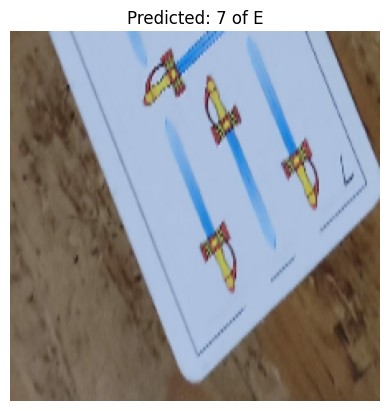

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess a single image
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to match the input size of the model
    image = tf.cast(image, tf.float32)
#     image = image / 255.0  # Normalize the image if your model expects normalized images
    return image

# Load and preprocess the image
image_path = '/kaggle/input/single-card2/78a396da-8815-4fc0-87d4-48281fe45adf.jpg'  # Replace with your image path
# image_path = '/kaggle/input/single-card3-2e/download.png'
image = preprocess_image(image_path)
print(image.shape)

# Crop the image to keep the required dimensions (ensure it remains (224, 224, 3))
image = image[100:, :, :]  # Adjusting the crop to ensure final dimensions

# Resize again to match the input shape expected by the model if needed
image = tf.image.resize(image, [224, 224])
print(image.shape)

# Expand the dimensions to match the input shape of the model (batch size, height, width, channels)
image = tf.expand_dims(image, axis=0)

# Assuming `model` is already defined and loaded
# Make the prediction
predictions = model.predict(image)

# Extract the number and suit predictions
predicted_numbers = predictions[0]
predicted_suits = predictions[1]

# Decode the predictions into human-readable form
def decode_predictions(predicted_numbers, predicted_suits):
    number_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    suit_labels = ['O', 'C', 'E', 'B', 'J']
    
    decoded_number = number_labels[np.argmax(predicted_numbers)]
    decoded_suit = suit_labels[np.argmax(predicted_suits)]
    
    return decoded_number, decoded_suit

decoded_number, decoded_suit = decode_predictions(predicted_numbers, predicted_suits)

# Print the predictions
print(f"Predicted Number: {decoded_number}")
print(f"Predicted Suit: {decoded_suit}")

# Plot the image with the prediction
plt.imshow(tf.squeeze(image).numpy() / 255.0)
plt.title(f"Predicted: {decoded_number} of {decoded_suit}")
plt.axis("off")
plt.show()


In [61]:
image.shape

TensorShape([1, 224, 224, 3])

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 468ms/step


ValueError: num must be an integer with 1 <= num <= 25, not 26

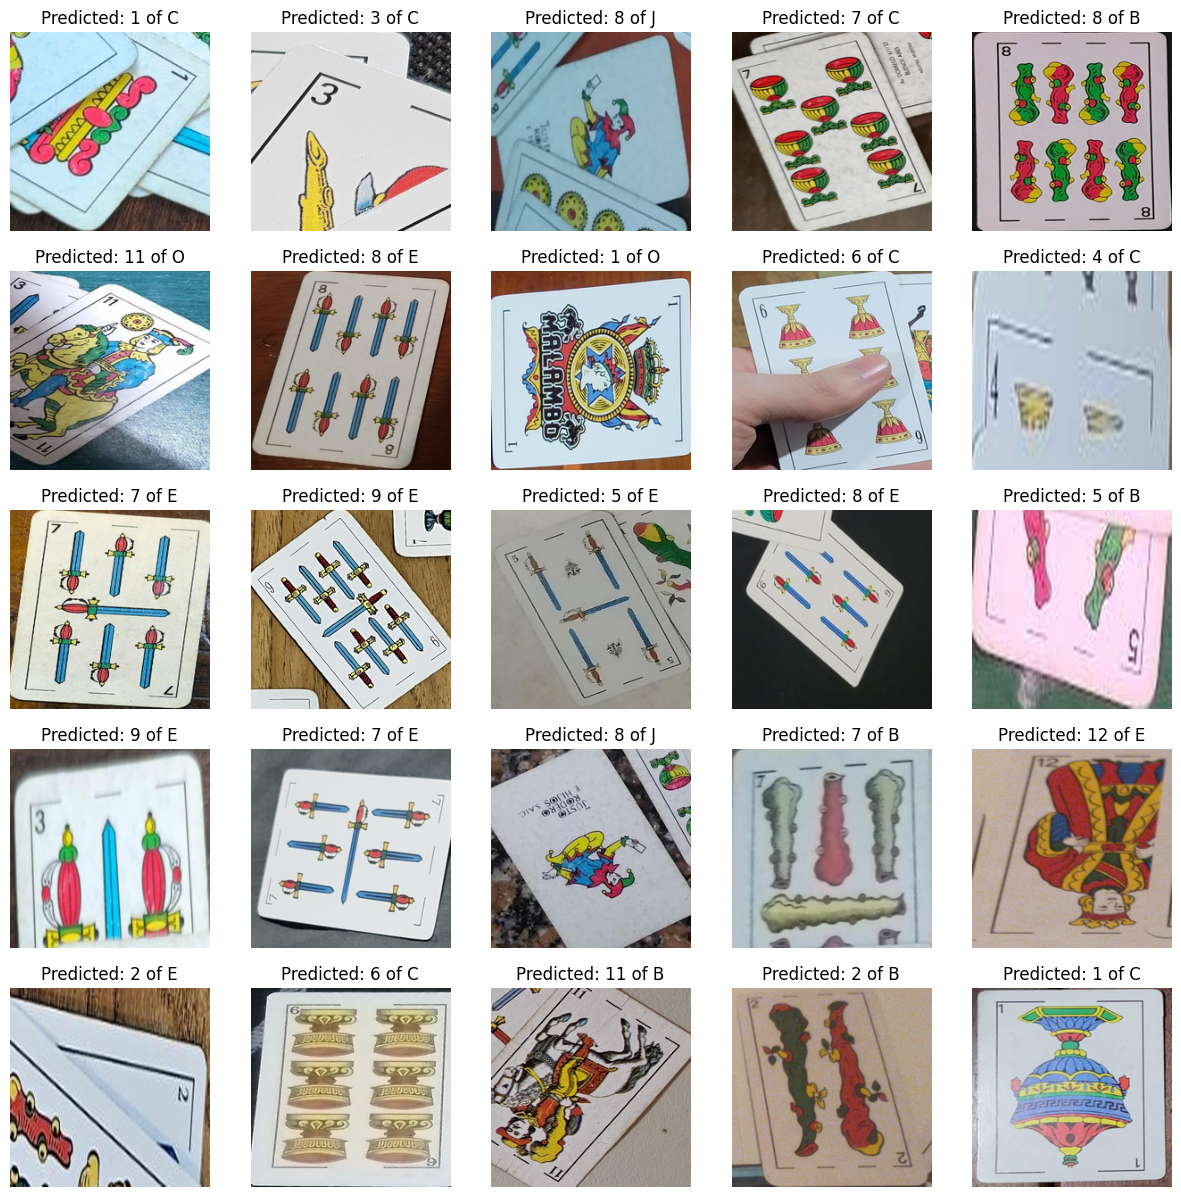

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
# model = tf.keras.models.load_model('path/to/your/model.keras')

# Take a few batches from the validation dataset
for images, (labels_numbers, labels_suits) in val_dataset.take(1):
    # Make predictions
    predictions = model.predict(images)
    
    # Extract the number and suit predictions
    predicted_numbers = predictions[0]
    predicted_suits = predictions[1]
    
    # Decode the predictions into human-readable form
    def decode_predictions(predicted_numbers, predicted_suits):
        number_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
        suit_labels = ['O', 'C', 'E', 'B', 'J']
        
        decoded_numbers = [number_labels[np.argmax(pred)] for pred in predicted_numbers]
        decoded_suits = [suit_labels[np.argmax(pred)] for pred in predicted_suits]
        
        return decoded_numbers, decoded_suits

    decoded_numbers, decoded_suits = decode_predictions(predicted_numbers, predicted_suits)
    
    # Plot the images with predictions
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {decoded_numbers[i]} of {decoded_suits[i]}")
        plt.axis("off")

    plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step


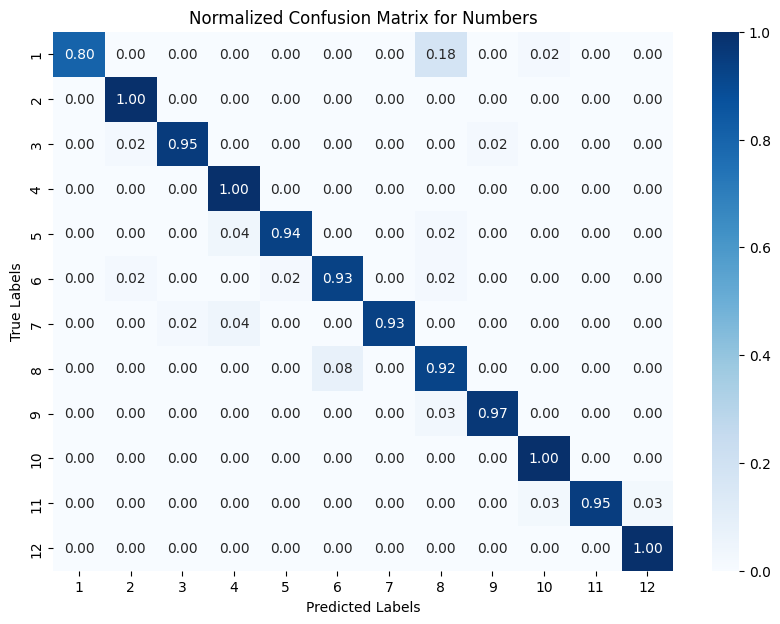

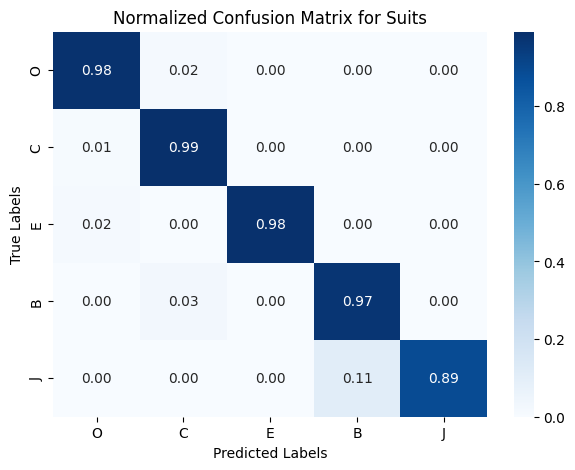

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load your trained model
# model = tf.keras.models.load_model('path/to/your/model.keras')

number_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
suit_labels = ['O', 'C', 'E', 'B', 'J']

# Initialize lists to hold true and predicted labels
true_numbers = []
true_suits = []
predicted_numbers = []
predicted_suits = []

# Iterate over the entire validation dataset
for images, (labels_numbers, labels_suits) in val_dataset:
    # Make predictions
    predictions = model.predict(images)
    
    # Extract the number and suit predictions
    predicted_numbers_batch = predictions[0]
    predicted_suits_batch = predictions[1]
    
    # Decode the predictions into human-readable form
    decoded_numbers_batch = [np.argmax(pred) for pred in predicted_numbers_batch]
    decoded_suits_batch = [np.argmax(pred) for pred in predicted_suits_batch]
    
    # Append the true labels and predicted labels to the lists
    true_numbers.extend(np.argmax(labels_numbers, axis=1))
    true_suits.extend(np.argmax(labels_suits, axis=1))
    predicted_numbers.extend(decoded_numbers_batch)
    predicted_suits.extend(decoded_suits_batch)

# Convert numeric labels to the actual labels for confusion matrix display
true_numbers_labels = [number_labels[i] for i in true_numbers]
true_suits_labels = [suit_labels[i] for i in true_suits]
predicted_numbers_labels = [number_labels[i] for i in predicted_numbers]
predicted_suits_labels = [suit_labels[i] for i in predicted_suits]

# Generate confusion matrices
conf_matrix_numbers = confusion_matrix(true_numbers_labels, predicted_numbers_labels, labels=number_labels)
conf_matrix_suits = confusion_matrix(true_suits_labels, predicted_suits_labels, labels=suit_labels)

# Normalize the confusion matrices
conf_matrix_numbers_normalized = conf_matrix_numbers.astype('float') / conf_matrix_numbers.sum(axis=1)[:, np.newaxis]
conf_matrix_suits_normalized = conf_matrix_suits.astype('float') / conf_matrix_suits.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix for numbers
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_numbers_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=number_labels, yticklabels=number_labels)
plt.title('Normalized Confusion Matrix for Numbers')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot normalized confusion matrix for suits
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix_suits_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=suit_labels, yticklabels=suit_labels)
plt.title('Normalized Confusion Matrix for Suits')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [1]:
import tensorflow as tf

# Assuming 'model' is your trained model
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optionally, apply optimizations (e.g., for smaller file size or faster inference)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('single_classifier.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TFLite format and saved as 'model.tflite'")


2024-08-07 02:45:34.039714: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 02:45:34.039785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 02:45:34.041799: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'model' is not defined

In [2]:
# !pip uninstall tensorflow -y
# !pip install tensorflow
!pip install tensorflow-lite

ERROR: Could not find a version that satisfies the requirement tensorflow-lite (from versions: none)
ERROR: No matching distribution found for tensorflow-lite


In [148]:
def representative_data_gen():
    for input_value, j in val_dataset.take(1):
        yield [input_value.numpy()]

In [1]:
import tensorflow as tf

# Example model training (for context)
# model = ... (define your model here)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.fit(x_train, y_train, epochs=5)

# Assuming 'model' is your trained model
# Save the model to the SavedModel format
# model.save('temp_saved_model.keras.h5')

# # Load the SavedModel
saved_model_dir = 'temp_saved_model.keras.h5'
# converter = tf.lite.TFLiteConverter.from_keras_model(saved_model_dir)
# Assuming 'model' is your trained model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.inference_input_type = tf.int8
# converter.inference_output_type = tf.int8
# converter.representative_dataset = representative_data_gen

# Optionally, apply optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert the model
tflite_model = converter.convert()

# Save the converted model to a file
with open('single_card_classificator.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model converted to TFLite format and saved as 'model.tflite'")


2024-08-03 15:08:56.759426: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 15:08:56.759531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 15:08:56.763357: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NameError: name 'model' is not defined

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load your trained TFLite model
tflite_model_path = '/kaggle/input/tflite-card-classificator/single_card_classificator.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to decode predictions
def decode_predictions(predicted_suits, predicted_numbers):
#     print(f"Numbers: {predicted_numbers}")
#     print(f"Suits: {predicted_suits}")
    number_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    suit_labels = ['O', 'C', 'E', 'B', 'J']
    
    decoded_numbers = [number_labels[np.argmax(pred)] for pred in predicted_numbers]
    decoded_suits = []
    for pred in predicted_suits:
        index = np.argmax(pred)
        if index < len(suit_labels):
            decoded_suits.append(suit_labels[index])
        else:
            decoded_suits.append('Unknown')  # Fallback in case of unexpected index
    
    return decoded_numbers, decoded_suits

# Take a few batches from the validation dataset
for images, (labels_numbers, labels_suits) in val_dataset.take(1):
    # Prepare to store predictions
    decoded_numbers = []
    decoded_suits = []
    
    for i in range(images.shape[0]):
        # Prepare the input data
        input_data = np.expand_dims(images[i].numpy(), axis=0)  # Expand dims to add batch dimension
        
        # Run inference
        interpreter.set_tensor(input_details[0]['index'], input_data)
        interpreter.invoke()
        
        # Extract the number and suit predictions
        predicted_numbers = interpreter.get_tensor(output_details[0]['index'])
        predicted_suits = interpreter.get_tensor(output_details[1]['index'])
        
        # Decode the predictions into human-readable form
        decoded_number, decoded_suit = decode_predictions(predicted_numbers, predicted_suits)
        decoded_numbers.append(decoded_number[0])
        decoded_suits.append(decoded_suit[0])
    
    # Plot the images with predictions
    for i in range(len(images)):
        plt.figure(figsize=(3, 3))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {decoded_numbers[i]} of {decoded_suits[i]}")
        plt.axis("off")
        plt.show()


2024-08-03 15:26:25.654615: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 15:26:25.654724: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 15:26:25.799102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ValueError: Didn't find op for builtin opcode 'FULLY_CONNECTED' version '12'. An older version of this builtin might be supported. Are you using an old TFLite binary with a newer model?
Registration failed.


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Extract a batch of data from the train_dataset
# train_iterator = iter(train_dataset)
# images, labels = next(train_iterator)

In [ ]:
# # Define the mapping from class index to class label
# class_labels = {i: str(i + 1) for i in range(12)}

# # Define indices of examples you want to compare
# indices_to_compare = [40, 41, 42, 43, 44, 45, 46]

# # Loop through the selected examples, predict, and plot
# for n in indices_to_compare:
#     image = images[n].numpy()
#     label = labels[n].numpy()

#     # Predict on the nth example
#     prediction = model.predict(np.expand_dims(image, axis=0))

#     # Get the true and predicted class indices
#     true_class_idx = np.argmax(label)
#     predicted_class_idx = np.argmax(prediction)

#     # Map the class indices to the corresponding labels
#     true_label = class_labels[true_class_idx]
#     predicted_label = class_labels[predicted_class_idx]

#     # Plot the image
#     plt.imshow(image)
#     plt.title(f"True Label: {true_label}\nPrediction: {predicted_label}")
#     plt.show()

#     # Print the true label and prediction
#     print(f"Example {n}:")
#     print("True Label:", true_label)
#     print("Prediction:", predicted_label)
#     print()

In [ ]:
# 1	2	3	4	5	6	7	8	9	10	11	12	O	C	E	B	J
n = 6
print(model.predict(X_train[n:n+1]))
plt.imshow(X_train[n])

In [ ]:
# print("Building model")
# model = build_transfer_model(input_shape=(224,224,3), num_classes=12)

# model.compile(
#     optimizer='adam',
#     loss= 'binary_crossentropy',
#     metrics=['accuracy']#tf.keras.metrics.AUC()]
# )#run_eagerly=True)

# model.summary()

In [ ]:
# model.fit(X_train_numbers, y_train_numbers_filtered, epochs=100, validation_data=(X_test_numbers, y_val_numbers_filtered), batch_size=256, callbacks=[save_best_model])

In [ ]:
# # model.fit_generator(X_train, y_train_numbers, epochs=15, validation_data=(X_val, y_val_numbers))

# def data_generator(X, y, batch_size):
#     """
#     Custom data generator.
#     """
#     num_samples = len(X)
#     indices = np.arange(num_samples)
#     while True:
#         np.random.shuffle(indices)  # Shuffle data for each epoch
#         for i in range(0, num_samples, batch_size):
#             batch_indices = indices[i: i + batch_size]
#             yield X[batch_indices], y[batch_indices]

# # Example usage:
# batch_size = 32  # Set your desired batch size
# model.fit(
#     data_generator(X_train_numbers, y_train_numbers_filtered, batch_size),
#     epochs=10,
#     steps_per_epoch=len(X_train_numbers) // batch_size,
#     validation_data=data_generator(X_test_numbers, y_val_numbers_filtered, batch_size),
#     validation_steps=len(X_test_numbers) // batch_size
# )

In [ ]:
from keras.regularizers import l2
# Función para construir el modelo
def build_model(input_shape, output_labels, final_activation='sigmoid'):
    i = Input(input_shape, dtype=tf.float32)
    x = i
#     x = RandomContrast(0.1)(i)
    x = tf.keras.layers.RandomRotation(0.3)(x)
    
    x_skip = Conv2D(32, (1,1), padding='same', strides=(2,2))(x)
    x_skip2 = Conv2D(128, (1,1), padding='same',strides=(4,4))(x)
    x = Conv2D(32, (3, 3), strides=(2,2), padding='same')(x)
#     x = BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, x_skip])
    x = Activation("relu")(x)
    
    x = MaxPooling2D((2, 2))(x)
    
#     x_skip = x
#     x = Conv2D(32, (5, 5), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)
#     x = MaxPooling2D((2, 2))(x)
    
    x_skip = Conv2D(128, (1,1), padding='same')(x)
    x_skip3 = Conv2D(256, (1,1), padding='same', strides=(2,2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, x_skip, x_skip2])
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)
    
    x_skip = Conv2D(256, (1,1), padding='same')(x)
#     x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, x_skip, x_skip3])
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2))(x)

    x_skip = x
#     x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), padding='same')(x)
#     x = BatchNormalization()(x)
    x = tf.keras.layers.Add()([x, x_skip])
    x = Activation("relu")(x)
    x = AveragePooling2D((7,7))(x)
#     x = MaxPooling2D((2, 2))(x)


    x = Flatten()(x)
    x = Dropout(0.5)(x)
    x = Dense(512)(x)
    x = Activation("relu")(x)
    x = Dropout(0.45)(x)
    x = Dense(100)(x)
    x = Activation("relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(50)(x)
    x = Activation("relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(output_labels, activation=final_activation)(x)
    return tf.keras.Model(inputs=[i], outputs=[x])

In [ ]:
# from keras.regularizers import l2
# from tensorflow.keras.layers import DepthwiseConv2D, BatchNormalization, Input, Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, RandomContrast, RandomRotation, Add
# from tensorflow.keras.models import Model

# # Function to build the model
# def build_model(input_shape, output_labels, final_activation='sigmoid'):
#     i = Input(input_shape, dtype=tf.float32)
# #     x = RandomContrast(0.2)(i)
#     x = RandomRotation(0.2)(i)

#     # Depthwise Separable Convolutions
#     def depthwise_separable_conv(x, filters, kernel_size, padding='same', strides=1, activation='relu', use_bn=True):
#         x = DepthwiseConv2D(kernel_size, padding=padding, strides=strides)(x)
#         x = Conv2D(filters, (1, 1), padding=padding, kernel_regularizer=l2(0.001))(x)  # Pointwise convolution
#         if use_bn:
#             x = BatchNormalization()(x)
#         x = Activation(activation)(x)
#         return x
#     # First block
#     x = depthwise_separable_conv(x, 8, (3, 3))
#     x = MaxPooling2D((2, 2))(x)
    
#     # First block
#     x = depthwise_separable_conv(x, 16, (3, 3))
#     x = MaxPooling2D((2, 2))(x)

#     # Second block
#     x = depthwise_separable_conv(x, 32, (3, 3))
#     x = MaxPooling2D((2, 2))(x)

#     # Third block
#     x = depthwise_separable_conv(x, 64, (3, 3))
#     x = MaxPooling2D((2, 2))(x)

#     # Fourth block
#     x = depthwise_separable_conv(x, 96, (3, 3))
#     x = MaxPooling2D((2, 2))(x)

#     # Global pooling
# #     x = GlobalMaxPooling2D()(x)

#     # Fully connected layers
#     x = Flatten()(x)
#     x = Dropout(0.4)(x)
#     x = Dense(128, kernel_regularizer=l2(0.001))(x)
#     x = Activation("relu")(x)
#     x = Dropout(0.3)(x)
#     x = Dense(64, kernel_regularizer=l2(0.001))(x)
#     x = Activation("relu")(x)
#     x = Dropout(0.2)(x)
#     x = Dense(output_labels, activation=final_activation)(x)

#     return Model(inputs=[i], outputs=[x])


In [ ]:
def multi_category_focal_loss2(gamma=2., alpha=.25):
    """
    focal loss for multi category of multi label problem
    适用于多分类或多标签问题的focal loss

    Usage:
     model.compile(loss=[multi_category_focal_loss2(alpha=0.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    epsilon = 1.e-7
    gamma = float(gamma)
    alpha = tf.constant(alpha, dtype=tf.float32)

    def multi_category_focal_loss2_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    
        alpha_t = y_true*alpha + (tf.ones_like(y_true)-y_true)*(1-alpha)
        y_t = tf.multiply(y_true, y_pred) + tf.multiply(1-y_true, 1-y_pred)
        ce = -tf.math.log(y_t)
        weight = tf.pow(tf.subtract(1., y_t), gamma)
        fl = tf.multiply(tf.multiply(weight, ce), alpha_t)
        loss = tf.reduce_mean(fl)
        return loss
    return multi_category_focal_loss2_fixed

def custom_loss():
    """
    Custom loss that handles numbers, suits, and Joker separately.
    Applies categorical cross-entropy for numbers and suits, and binary cross-entropy for Joker.
    """
    def loss(y_true, y_pred):
        # Separate the true labels and predictions
        y_true_num = y_true[:, :12]  # First 12 labels are numbers
        y_pred_num = y_pred[:, :12]
        y_true_suit = y_true[:, 12:17]  # Next 5 labels are suits
        y_pred_suit = y_pred[:, 12:17]
        
        # Categorical cross-entropy for numbers
        loss_num = tf.keras.losses.categorical_crossentropy(y_true_num, y_pred_num, from_logits=False)

        # Categorical cross-entropy for suits
        loss_suit = tf.keras.losses.categorical_crossentropy(y_true_suit, y_pred_suit, from_logits=False)

        # Combine the losses
        total_loss = tf.reduce_mean(loss_num) + tf.reduce_mean(loss_suit)
        return total_loss

    return loss


def custom_accuracy(y_true, y_pred):
    """
    Custom accuracy for card classification problem.
    A correct guess is when both the number and the suit match for non-Joker cards.
    For Joker cards, the 'J' must be the highest among the suits.
    """
    # Separate the true labels and predictions
    y_true_num = y_true[:, :12]  # First 12 labels are numbers
    y_pred_num = y_pred[:, :12]
    y_true_suit = y_true[:, 12:16]  # Next 4 labels are suits
    y_pred_suit = y_pred[:, 12:16]
    y_true_joker = y_true[:, 16]  # Last label is Joker
    y_pred_joker = y_pred[:, 16]

    # Predicted number and suit indices
    pred_num_idx = tf.argmax(y_pred_num, axis=1)
    true_num_idx = tf.argmax(y_true_num, axis=1)
    pred_suit_idx = tf.argmax(y_pred_suit, axis=1)
    true_suit_idx = tf.argmax(y_true_suit, axis=1)

    # Correct predictions for non-Joker cards (both number and suit must match)
    correct_non_joker = tf.logical_and(
        tf.equal(pred_num_idx, true_num_idx),
        tf.equal(pred_suit_idx, true_suit_idx)
    )

    # Correct predictions for Joker cards (J must be the highest among suits)
    correct_joker = tf.logical_and(
        tf.equal(true_suit_idx, 3),  # Assuming 'J' is the 4th suit (index 3)
        tf.equal(pred_suit_idx, 3)
    )

    # Combine non-Joker and Joker accuracies
    correct_predictions = tf.logical_or(correct_non_joker, correct_joker)

    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy


In [ ]:
# Example usage:
input_shape = (224, 224, 3)
# num_classes = 12  # Numbers 1-12
# suit_classes = 5  # Suits O, C, E, B + Joker

model = build_model(input_shape, 12, final_activation='softmax')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
model.summary()

# tf.keras.metrics.AUC

In [49]:
import tensorflow as tf
import numpy as np

class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False, verbose=1):
        super(SaveBestModel, self).__init__()
        self.save_best_metric = save_best_metric
        self.max = this_max
        self.verbose = verbose
        self.best_weights = None
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs.get(self.save_best_metric)
        if metric_value is None:
            return  # Skip if the metric is not in logs

        if np.isnan(metric_value):
            if self.verbose > 0:
                print(f"Skipping saving model at epoch {epoch+1} due to NaN in {self.save_best_metric}.")
            return  # Skip saving if the metric is NaN

        if (self.max and metric_value > self.best) or (not self.max and metric_value < self.best):
            self.best = metric_value
            self.best_weights = self.model.get_weights()
            if self.verbose > 0:
                print(f"Saving best model at epoch {epoch+1} with {self.save_best_metric}: {self.best}")

    def on_train_end(self, logs=None):
        if self.best_weights is not None:
            self.model.set_weights(self.best_weights)
            if self.verbose > 0:
                print(f"Best model weights restored with {self.save_best_metric}: {self.best}")



In [58]:
# save_best_model = SaveBestModel()
# print(save_best_model.best)

2.399348497390747


# model.fit(X_train, y_train[:, :12], epochs=50, validation_data=(X_val, y_val[:, :12]), batch_size=180, callbacks=[save_best_model])#, early_stopping])

In [ ]:
model.set_weights(save_best_model.best_weights)

In [ ]:
# 1	2	3	4	5	6	7	8	9	10	11	12	O	C	E	B	J
n = 17
print(model.predict(X_val[n:n+1]))
plt.imshow(X_val[n])

In [ ]:
# # model.fit_generator(X_train, y_train_numbers, epochs=15, validation_data=(X_val, y_val_numbers))

# def data_generator(X, y, batch_size):
#     """
#     Custom data generator.
#     """
#     num_samples = len(X)
#     indices = np.arange(num_samples)
#     while True:
#         np.random.shuffle(indices)  # Shuffle data for each epoch
#         for i in range(0, num_samples, batch_size):
#             batch_indices = indices[i: i + batch_size]
#             yield X[batch_indices], y[batch_indices]

# # Example usage:
# batch_size = 32  # Set your desired batch size
# model.fit(
#     data_generator(X_train, y_train, batch_size),
#     epochs=20,
#     steps_per_epoch=len(X_train) // batch_size,
#     validation_data=data_generator(X_val, y_val, batch_size),
#     validation_steps=len(X_val) // batch_size
# )# model_numbers.fit(X_train, y_train_suits, epochs=50, validation_data=(X_val, y_val_suits), batch_size=16)

In [ ]:
model.load_weights('/kaggle/input/cartas-classifier/number_card_model.weights.h5')

In [ ]:
# # assign location
# path='number_card_model.weights.h5'

# # save
# model.save_weights(path)

In [ ]:
# def build_model2(input_shape, num_classes):
#     base_model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape,
#                                                 include_top=False,
#                                                 weights='imagenet')
#     # base_model.trainable = False
#     # freeze all layers except the last one
#     for layer in base_model.layers:
#         layer.trainable = True
#     base_model.layers[-1].trainable = True

#     last_output = base_model.layers[-1].output
#     # i = Input(shape=input_shape)
#     x = base_model(i, training=False)
#     x = GlobalMaxPooling2D()(last_output)
#     # x = Dense(100)(x)
#     # x = Dropout(0.1)(x)
#     # x = Dense(100)(x)
#     x = Flatten()(x)
#     x = Dropout(0.4)(x)
#     x = Dense(50, activation='relu')(x)
#     x = Dropout(0.2)(x)
#     x = Dense(20, activation='relu')(x)
#     x = Dropout(0.1)(x)
#     x = Dense(num_classes, activation='sigmoid')(x)
#     # x = Activation("softmax")(x)

#     return tf.keras.Model(base_model.input, x)

In [ ]:
# print("Building model")
# model = build_model2(input_shape=(100,100,3), num_classes=17)

# model.compile(
#     optimizer='adam',
#     loss= multi_category_focal_loss2(alpha=0.25, gamma=2),#'binary_crossentropy',
#     metrics=[tf.keras.metrics.AUC()]
# )#run_eagerly=True)

# model.summary()

In [ ]:
# # 1	2	3	4	5	6	7	8	9	10	11	12	O	C	E	B	J
# n = 4
# print(model.predict(X_val[n:n+1]))
# plt.imshow(X_val[n])

In [ ]:
# 1	2	3	4	5	6	7	8	9	10	11	12	O	C	E	B	J
# model.predict(X_val[20:21])

In [ ]:
# plt.imshow(X_val[20])

In [ ]:
y_val[0]

# Separar modelo en números y palos


In [ ]:
# from keras.regularizers import l2
# # Función para construir el modelo
# def build_model(input_shape, output_labels, final_activation='sigmoid'):
#     i = Input(input_shape, dtype=tf.float32)
#     x = RandomContrast(0.2)(i)
#     x = tf.keras.layers.Resizing(224, 224)(x)
#     x_skip = Conv2D(4, (1,1), padding='same')(x)
#     x = Conv2D(4, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)
#     x = MaxPooling2D((2, 2))(x)

#     x_skip = Conv2D(8, (1,1), padding='same')(x)
#     x = Conv2D(8, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)

#     x_skip = Conv2D(32, (1,1), padding='same')(x)
#     x = Conv2D(32, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)

#     x = MaxPooling2D((2, 2))(x)

#     x_skip = x
#     x = Conv2D(32, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)
#     x = MaxPooling2D((2, 2))(x)

#     x_skip = Conv2D(64, (1,1), padding='same')(x)
#     x = Conv2D(64, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)
#     x = MaxPooling2D((2, 2))(x)

#     x_skip = Conv2D(98, (1,1), padding='same')(x)
#     x = Conv2D(98, (3, 3), padding='same')(x)
#     x = tf.keras.layers.Add()([x, x_skip])
#     x = Activation("relu")(x)
#     x = MaxPooling2D((2, 2))(x)


#     x = Flatten()(x)
#     x = Dropout(0.4)(x)
#     x = Dense(50)(x)
#     x = Activation("relu")(x)
#     x = Dropout(0.2)(x)
#     x = Dense(50)(x)
#     x = Dropout(0.1)(x)
#     x = Dense(20)(x)
#     x = Activation("relu")(x)
#     x = Dropout(0.1)(x)
#     x = Dense(output_labels, activation=final_activation)(x)
#     return tf.keras.Model(inputs=[i], outputs=[x])

In [ ]:
# print("Building model")
# model_numbers = build_model(input_shape=(224,224,3), output_labels=12, final_activation='softmax')

# model_numbers.compile(
#     optimizer='adam',
#     loss= 'binary_crossentropy',
#     metrics=['accuracy']#[tf.keras.metrics.AUC()]
# )#run_eagerly=True)

# model_numbers.summary()

In [ ]:
# # model.fit_generator(X_train, y_train_numbers, epochs=15, validation_data=(X_val, y_val_numbers))

# def data_generator(X, y, batch_size):
#     """
#     Custom data generator.
#     """
#     num_samples = len(X)
#     indices = np.arange(num_samples)
#     while True:
#         np.random.shuffle(indices)  # Shuffle data for each epoch
#         for i in range(0, num_samples, batch_size):
#             batch_indices = indices[i: i + batch_size]
#             yield X[batch_indices], y[batch_indices]

# # Example usage:
# batch_size = 16  # Set your desired batch size
# model_numbers.fit(
#     data_generator(X_train_numbers, y_train_numbers_filtered, batch_size),
#     epochs=20,
#     steps_per_epoch=len(X_train_numbers) // batch_size,
#     validation_data=data_generator(X_test_numbers, y_val_numbers_filtered, batch_size),
#     validation_steps=len(X_test_numbers) // batch_size
# )# model_numbers.fit(X_train, y_train_suits, epochs=50, validation_data=(X_val, y_val_suits), batch_size=16)

In [ ]:
# # 1	2	3	4	5	6	7	8	9	10	11	12	O	C	E	B	J
# n = 3
# print(model.predict(X_val[n:n+1]))
# plt.imshow(X_val[n])

In [ ]:
plt.imshow(X_val[20])